<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#gold_recovery_train" data-toc-modified-id="gold_recovery_train-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>gold_recovery_train</a></span></li><li><span><a href="#gold_recovery_test" data-toc-modified-id="gold_recovery_test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>gold_recovery_test</a></span></li><li><span><a href="#gold_recovery_full" data-toc-modified-id="gold_recovery_full-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>gold_recovery_full</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-концентрации-металлов-на-различных-ступенях-обработки" data-toc-modified-id="Распределение-концентрации-металлов-на-различных-ступенях-обработки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение концентрации металлов на различных ступенях обработки</a></span></li><li><span><a href="#Распределения-гранул-сырья" data-toc-modified-id="Распределения-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-этапах-очистки" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-этапах-очистки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных этапах очистки</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-smape" data-toc-modified-id="Функция-smape-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция smape</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тестовая выборка</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Константная модель</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
gold_recovery_train = gold_recovery_train.set_index('date')
gold_recovery_test = gold_recovery_test.set_index('date')
gold_recovery_full = gold_recovery_full.set_index('date')

In [4]:
gold_recovery_test_merged = gold_recovery_test.merge(gold_recovery_full[['rougher.output.recovery',
                                                                         'final.output.recovery']].loc[gold_recovery_test.index], 
                                                             on='date', how='left')

### gold_recovery_train

In [5]:
gold_recovery_train.head(5)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [7]:
gold_recovery_train.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [8]:
gold_recovery_train.duplicated().sum()

0

Рассчитаем эффективность обогащения чернового концентрата rougher.output.recovery из обучающей выборки. Предварительно удалим пропуски из столбцов со значением NaN.

In [9]:
gold_recovery_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)
gold_recovery_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 
                                   'rougher.output.tail_au','rougher.output.recovery']].isna().sum()

rougher.output.concentrate_au    0
rougher.input.feed_au            0
rougher.output.tail_au           0
rougher.output.recovery          0
dtype: int64

In [10]:
concentrate_au_train = gold_recovery_train['rougher.output.concentrate_au']
feed_au_train = gold_recovery_train['rougher.input.feed_au']
tail_au_train = gold_recovery_train['rougher.output.tail_au']
recovery_train = gold_recovery_train['rougher.output.recovery']
calculated_recovery = ((concentrate_au_train * (feed_au_train - tail_au_train)) / (feed_au_train * (concentrate_au_train - tail_au_train))) * 100
print('Абсолютная средняя ошибка =', mean_absolute_error(recovery_train, calculated_recovery))

Абсолютная средняя ошибка = 9.73512347450521e-15


Показатель абсолютной средней ошибки крайне мал, следовательно можно сделать вывод, что показаль `recovery` совпадает с данными из столбца

In [11]:
gold_recovery_train = gold_recovery_train.dropna()
gold_recovery_train.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

In [12]:
gold_recovery_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### gold_recovery_test

In [13]:
gold_recovery_test_merged.head(5)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [14]:
gold_recovery_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [15]:
gold_recovery_test_merged.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [16]:
gold_recovery_test_merged.duplicated().sum()

0

In [17]:
gold_recovery_test_merged = gold_recovery_test_merged.dropna()
gold_recovery_test_merged.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

В тестовой выборке отсуствуют столбцы этапов `rougher.output`, `rougher.calculation`, `final.output`, `primary_cleaner.output` и `secondary_cleaner.output`. Эти данные будут получены по результатам технологического процесса.  Остальные столбцы исторически известны. 

In [18]:
gold_recovery_test_merged.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


### gold_recovery_full

In [19]:
gold_recovery_full.head(5)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [20]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [21]:
gold_recovery_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [22]:
gold_recovery_full.duplicated().sum()

0

In [23]:
gold_recovery_full = gold_recovery_full.dropna()

In [24]:
gold_recovery_full.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

In [25]:
gold_recovery_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Вывод

Были проанализированны предаставленные данные. В таблицах присутствовали пропуски данных, которые мы никак не можем заменить, поэтому было принято решение удалить эти данные. 

Также, во всех таблицах был удален столбец `date` так как он не будет использоваться в построеннии модели.

В тестовой выборке отсуствуют столбцы этапов `rougher.output`, `rougher.calculation`, `final.output`, `primary_cleaner.output` и `secondary_cleaner.output`. Эти данные будут получены по результатам технологического процесса.  Остальные столбцы исторически известны.

## Анализ данных

### Распределение концентрации металлов на различных ступенях обработки

In [26]:
def graph (metal, title):
    x0 = gold_recovery_full[f'rougher.input.feed_{metal}']
    x1 = gold_recovery_full[f'rougher.output.concentrate_{metal}']
    x2 = gold_recovery_full[f'primary_cleaner.output.concentrate_{metal}']
    x3 = gold_recovery_full[f'final.output.concentrate_{metal}']
    
    plt.figure(figsize=(13,10), dpi= 80)
    sns.distplot(x0, color="dodgerblue", label="Сырье", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(x1, color="orange", label="Черновой", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(x2, color="g", label="Первичная очистка", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(x3, color="y", label="Финальный этап", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

    plt.title(label=f'Концентрация {title} на различных этапах очистки', fontsize=22)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    plt.show()

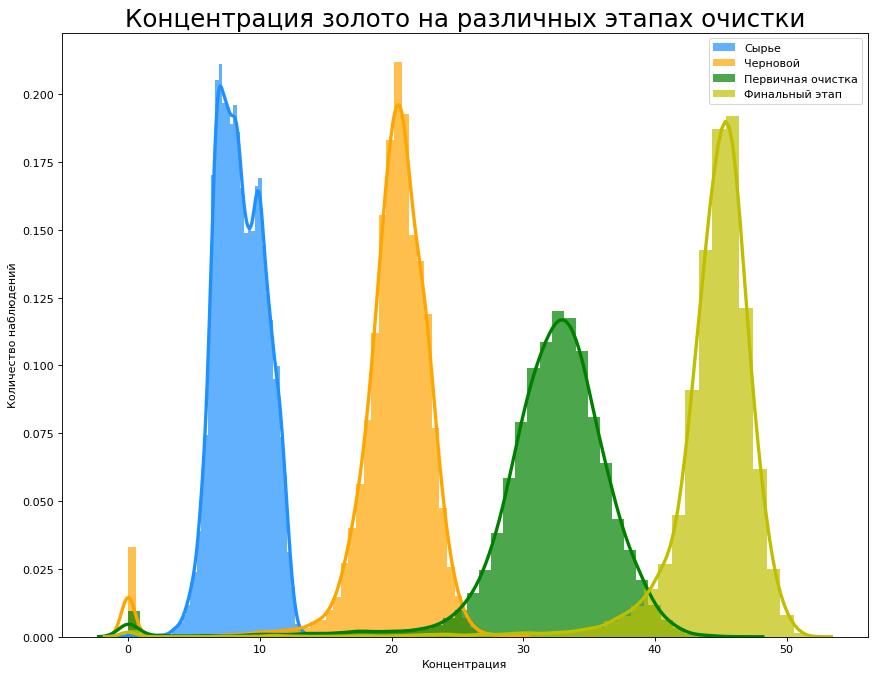

In [27]:
graph('au', 'золото')

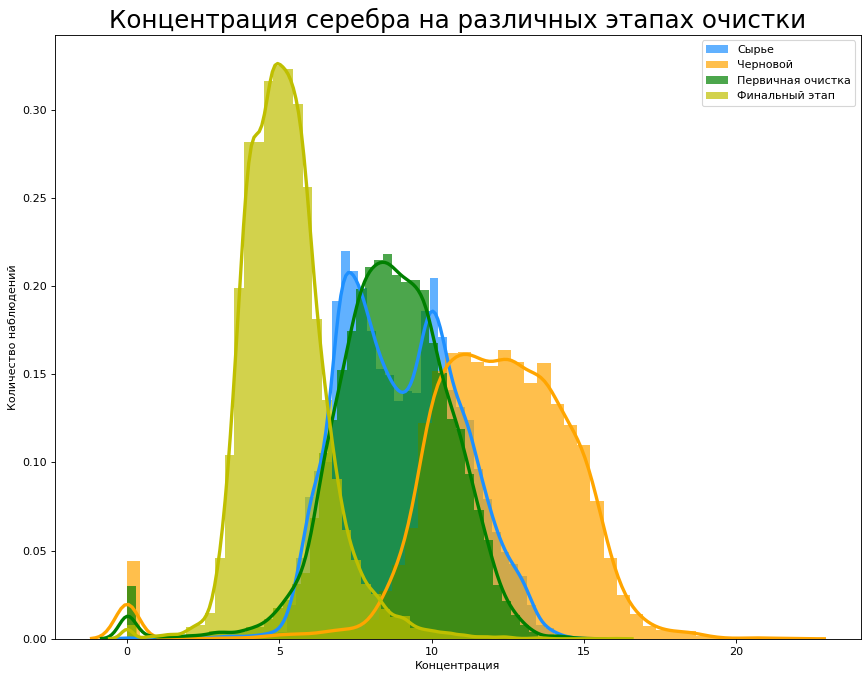

In [28]:
graph('ag', 'серебра')

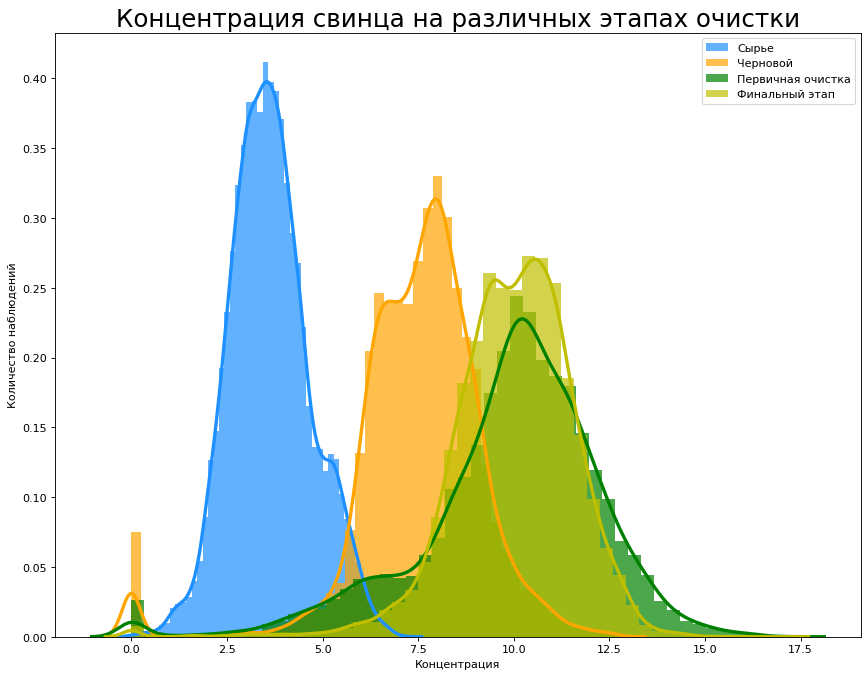

In [29]:
graph('pb', 'свинца')

Вывод:

* Концентрация золота увеличивается после каждого этапа очистки
* Концентрация серебра увеличивается после флотации и уменьшается после следующих этапов
* Концентрация свинца снижается после первого этапа очистки и незначительно изменяется в дальнейшем

### Распределения гранул сырья

In [30]:
def granul (size, title):
    x0 = gold_recovery_train[f'{size}.input.feed_size']
    x1 = gold_recovery_test[f'{size}.input.feed_size']
    
    plt.figure(figsize=(13,10), dpi= 80)
    sns.distplot(x0, color="dodgerblue", label="gold_recovery_train", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(x1, color="orange", label="gold_recovery_test", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

    plt.title(label=f'Распределение размеров гранул сырья для {title}', fontsize=22)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    plt.show()

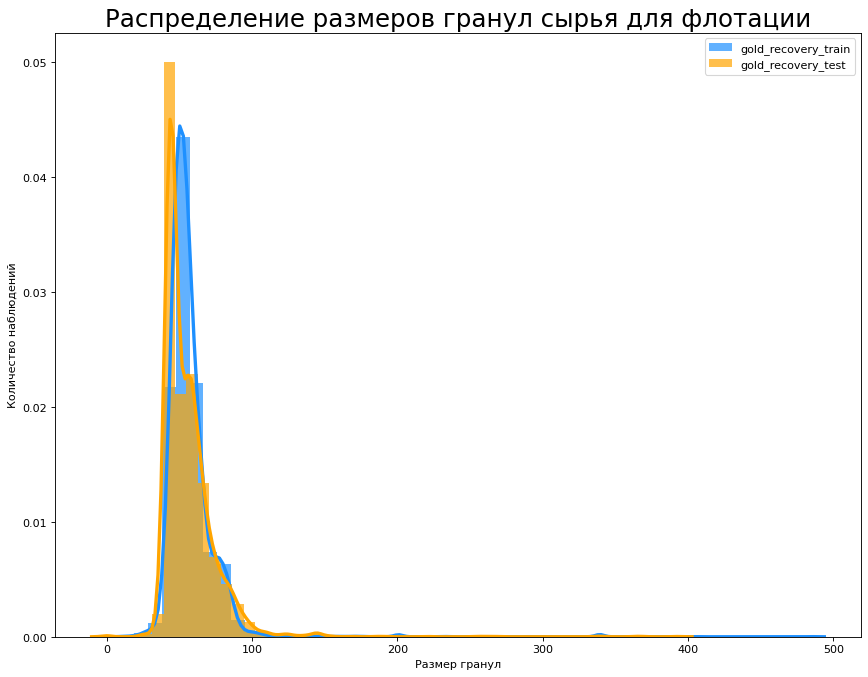

In [31]:
granul('rougher', 'флотации')

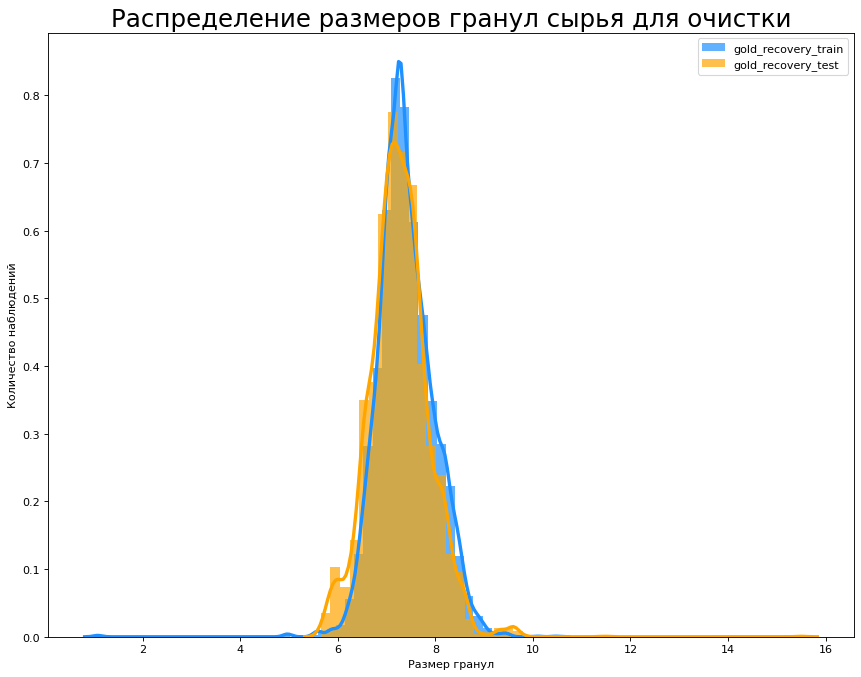

In [32]:
granul('primary_cleaner', 'очистки')

* Как мы видим распределения очень похожи

### Суммарная концентрация всех веществ на разных этапах очистки

In [33]:
metal = ['ag', 'au', 'pb', 'sol']
steps = ['rougher.input.feed_',
        'rougher.output.concentrate_', 
         'final.output.concentrate_']

In [34]:
for step in steps:
    gold_recovery_full[step] = gold_recovery_full[step + metal[0]] + gold_recovery_full[step + metal[1]] + gold_recovery_full[step + metal[2]] + gold_recovery_full[step + metal[3]]

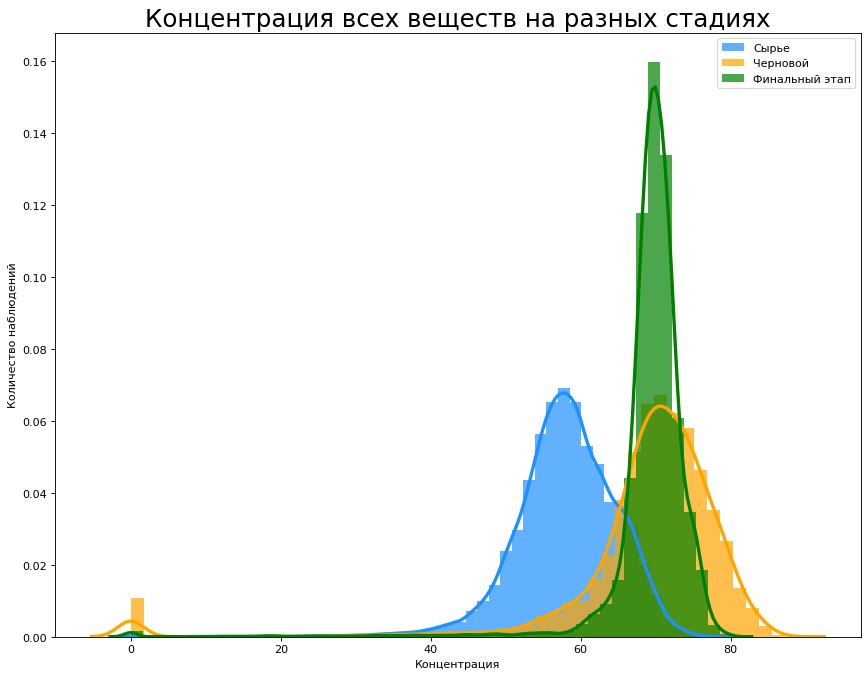

In [35]:
x0 = gold_recovery_full['rougher.input.feed_']
x1 = gold_recovery_full['rougher.output.concentrate_']
x2 = gold_recovery_full['final.output.concentrate_']
 
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(x0, color="dodgerblue", label="Сырье", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(x1, color="orange", label="Черновой", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(x2, color="g", label="Финальный этап", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=22)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

По распределению видно, что присутствуют выбросы. Есть много значению от 0 до 40, которые можно удалить. их очень много,а чистота их нулевая. Поэтому, думаю можно их удалить, чтобы не мешали обучению модели.

In [36]:
gold_recovery_full = gold_recovery_full[(gold_recovery_full['rougher.input.feed_'] > 40) &
         (gold_recovery_full['rougher.output.concentrate_'] > 40) & 
         (gold_recovery_full['final.output.concentrate_'] > 40)]
gold_recovery_full.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed_,rougher.output.concentrate_,final.output.concentrate_
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915,48.838521,64.955919,63.646320
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470,49.120760,65.372419,63.156407
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070,50.790724,65.180132,62.908843
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188,50.550288,65.625127,64.185763


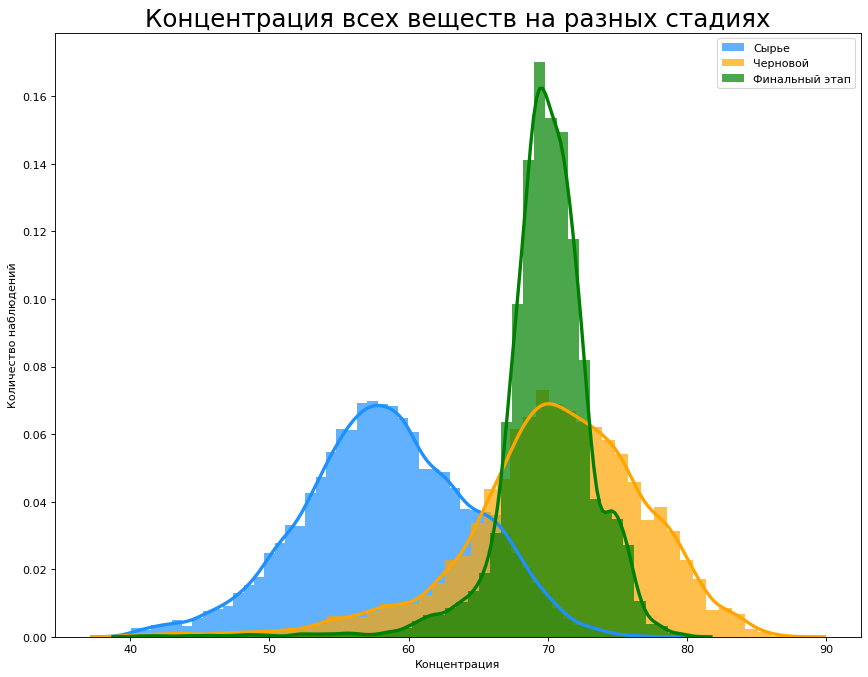

In [37]:
x0 = gold_recovery_full['rougher.input.feed_']
x1 = gold_recovery_full['rougher.output.concentrate_']
x2 = gold_recovery_full['final.output.concentrate_']
 
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(x0, color="dodgerblue", label="Сырье", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(x1, color="orange", label="Черновой", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(x2, color="g", label="Финальный этап", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=22)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

## Модель

Удалим из обучающей выборки столбцы, которых нету в тестовой модели

In [38]:
def missa (train, test):
    result = set(train.columns.to_list())-set(test.columns.to_list())
    return result

In [39]:
missing_model = missa(gold_recovery_train, gold_recovery_test_merged)
gold_recovery_train = gold_recovery_train.drop(columns=list(missing_model))
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       11017 non-null  float64
 1   primary_cleaner.input.sulfate               11017 non-null  float64
 2   primary_cleaner.input.depressant            11017 non-null  float64
 3   primary_cleaner.input.feed_size             11017 non-null  float64
 4   primary_cleaner.input.xanthate              11017 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      11017 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    11017 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      11017 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    11017 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      11017 non-nu

In [40]:
features_train = gold_recovery_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns')
target_train = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']]

features_test = gold_recovery_test_merged.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns')
target_test = gold_recovery_test_merged[['rougher.output.recovery', 'final.output.recovery']]

In [41]:
features_train.shape

(11017, 52)

In [42]:
features_test.shape

(5229, 52)

### Функция smape

In [43]:
def smape(target, predictions): 
    return 1 / len(target) * np.sum(2 * np.abs(target - predictions) / (np.abs(target) + np.abs(predictions)) * 100)

def final_smape(target, predictions):
    return (0.25 * smape(target.iloc[:, 0], predictions[:, 0]) + 0.75 * smape(target.iloc[:, 1], predictions[:, 1]))

smape_scorer = make_scorer(final_smape, greater_is_better=False)

### Линейная регрессия

In [44]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)
smape_model_LR = cross_val_score(model_LR, features_train, target_train, cv=5, scoring=smape_scorer).mean()
print('Лучший результат smape линейной регрессии:', -smape_model_LR)

Лучший результат smape линейной регрессии: 10.290896728293268


### Дерево решений

In [45]:
parametrs_mt = {'max_depth': range(2, 30)}
    
model_dr = DecisionTreeRegressor(random_state=12345)
grid_dr = GridSearchCV(model_dr, parametrs_mt, cv=5, scoring=smape_scorer)
grid_dr.fit(features_train, target_train)
print('Лучший результат smape Дерева Решений: {}, при глубине {}'. format(-grid_dr.best_score_,
                                                                         grid_dr.best_params_))

Лучший результат smape Дерева Решений: 9.256795905147513, при глубине {'max_depth': 2}


### Случайный лес

In [46]:
parametrs_sl = {'max_depth': range(2, 20, 5),
               'n_estimators': range(10, 20, 5)}

model_sl = RandomForestRegressor(random_state=12345)
grid_sl = GridSearchCV(model_sl, parametrs_sl, cv=5, scoring=smape_scorer)
grid_sl.fit(features_train, target_train)
print('Лучший результат smape Случайного леса: {}, при гиперпараметрах {}'. format(-grid_sl.best_score_,
                                                                         grid_sl.best_params_))

Лучший результат smape Случайного леса: 9.03521693559292, при гиперпараметрах {'max_depth': 2, 'n_estimators': 10}


### Тестовая выборка

In [47]:
best_model = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=12345)
best_model.fit(features_train, target_train)
predictions_test = best_model.predict(features_test)
print('Показатель smape модели случайного леса с заданными гиперпараметрами тестовой выборки:', final_smape(target_test, predictions_test))

Показатель smape модели случайного леса с заданными гиперпараметрами тестовой выборки: 9.229555762236405


### Константная модель

In [48]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train, target_train)
predicition_dummy = dummy.predict(features_test)
print('Показатель smape для Dummy model:', final_smape(target_test, predicition_dummy))

Показатель smape для Dummy model: 9.736782265639786


Как показали все наши модели, модель Случайного леса на тестовой модели, показала себя лучше (sMAPE = 9,04), чем константная модель (sMAPE = 9.74)